# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

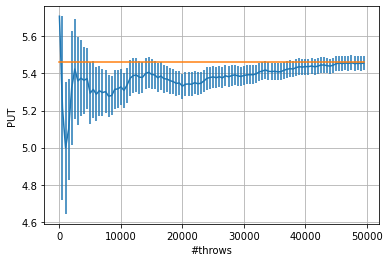

5.45556 with err:  0.0380851


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

mean = np.loadtxt("DirettoPut.txt");
meanerr = np.loadtxt("DirettoPutErr.txt");

M=50000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
line = np.zeros(N)
line += 5.4595325819072364;

x*=L
plt.errorbar(x,mean,yerr=meanerr)
plt.errorbar(x,line,yerr=0)
plt.xlabel('#throws')
plt.ylabel('PUT')
plt.grid(True)
plt.show()
print(mean[N-1], "with err: ", meanerr[N-1])

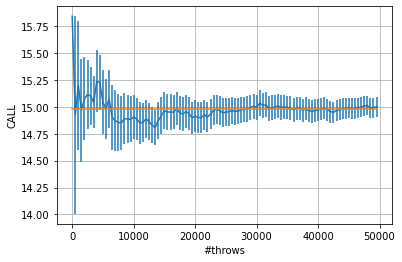

15.0001 with err:  0.0923059


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

mean = np.loadtxt("DirettoCall.txt");
meanerr = np.loadtxt("DirettoCallErr.txt");

M=50000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
line = np.zeros(N)
line += 14.975790778311286;

x*=L
plt.errorbar(x,mean,yerr=meanerr)
plt.errorbar(x,line,yerr=0)
plt.xlabel('#throws')
plt.ylabel('CALL')
plt.grid(True)
plt.show()
print(mean[N-1], "with err: ", meanerr[N-1])

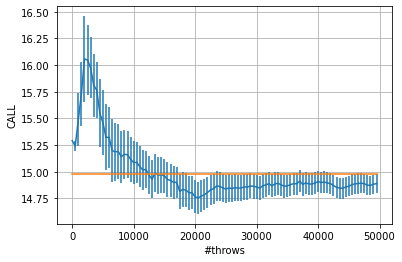

14.8891 with err:  0.0902168


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

mean = np.loadtxt("inDirettoCall.txt");
meanerr = np.loadtxt("inDirettoCallErr.txt");

M=50000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
line = np.zeros(N)
line += 14.975790778311286;

x*=L
plt.errorbar(x,mean,yerr=meanerr)
plt.errorbar(x,line,yerr=0)
plt.xlabel('#throws')
plt.ylabel('CALL')
plt.grid(True)
plt.show()
print(mean[N-1], "with err: ", meanerr[N-1])

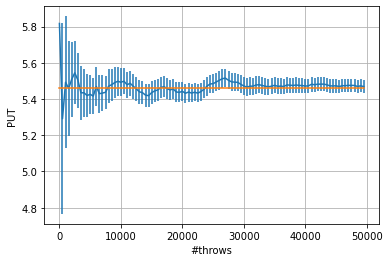

5.46896 with err:  0.0354752


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

mean = np.loadtxt("inDirettoPut.txt");
meanerr = np.loadtxt("inDirettoPutErr.txt");

M=50000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
line = np.zeros(N)
line += 5.4595325819072364;

x*=L
plt.errorbar(x,mean,yerr=meanerr)
plt.errorbar(x,line,yerr=0)
plt.xlabel('#throws')
plt.ylabel('PUT')
plt.grid(True)
plt.show()
print(mean[N-1], "with err: ", meanerr[N-1])

In [56]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


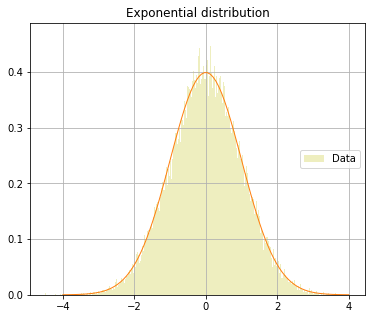

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
e1 = np.loadtxt("Ga.out"); 

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.hist(e1, bins = 500, density = True, alpha = .25, facecolor = 'y', label = 'Data')
ax.grid(True)
plt.title('Exponential distribution')
ax.legend(loc='right')
t = np.linspace(-4, 4, 100)
sig = (1/np.sqrt(2*3.14))*np.exp((-1/2)*(t)*(t))
ax.plot(t, sig, linewidth=1, label='Gaussian')

In [61]:
#
# Monte Carlo valuation of European call options with NumPy (log version)
# Monte_Carlo.py
#
import math
from numpy import *
from time import time
# star import for shorter code
random.seed(200)
t0 = time()
# Parameters
S0 = 100.; K = 100.; T = 1.0; r = 0.1; sigma = 0.25
M = 100; dt = T / M; I = 50000
# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * random.standard_normal((M + 1, I)), axis=0))
# sum instead of cumsum would also do
# if only the final values are of interest
S[0] = S0
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
# Results output
tnp2 = time() - t0

print('The European Option Value is: ', C0)  # The European Option Value is:  8.165807966259603
print('The Execution Time is: ',tnp2)  # The Execution Time is:  0.9024488925933838

The European Option Value is:  15.174921612322844
The Execution Time is:  0.42977476119995117
